# Мамонотов Степан; Неклеенов Илья ИУ8-85

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
train_df = pd.read_csv("data/train.csv")

In [3]:
print(train_df.head())
print(train_df.request[1])
print(train_df.request[2])

                                             request  y_true
0  \nThu, 15 Mar 2018 14:45:52 INFO\nGET /vulnban...     0.0
1  \nThu, 15 Mar 2018 14:45:52 INFO\nPOST /vulnba...     1.0
2  \nThu, 15 Mar 2018 14:45:52 INFO\nPOST /vulnba...     0.0
3  \nThu, 15 Mar 2018 14:45:52 INFO\nPOST /vulnba...     0.0
4  \nThu, 15 Mar 2018 14:45:52 INFO\nGET /vulnban...     0.0

Thu, 15 Mar 2018 14:45:52 INFO
POST /vulnbank/online/api.php HTTP/1.1
Host: 10.0.212.25
Connection: keep-alive
Content-Length: 159
Accept: application/json, text/javascript, */*; q=0.01
Origin: http://10.0.212.25
X-Requested-With: XMLHttpRequest
User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.139 Safari/537.36
Content-Type: application/x-www-form-urlencoded; charset=UTF-8
DNT: 1
Referer: http://10.0.212.25/vulnbank/online/userinfo.php
Accept-Encoding: gzip, deflate
Accept-Language: en-US,en;q=0.9,ru;q=0.8
Cookie: PHPSESSID=7bgg5tald4aea80790it7s1cc1

type=user&action=infoupd

In [4]:
value_counts = train_df.y_true.value_counts()
anomaly_fraction = value_counts[1]/value_counts[0]
print(anomaly_fraction)
print(value_counts[0])
print(value_counts[1])

0.029922692132787632
10995
329


In [5]:
train_df.request = train_df.request.apply(lambda x : x.replace('&', ' ').replace(',', ' '))
print(train_df.request[1])
print(train_df.request[2])


Thu  15 Mar 2018 14:45:52 INFO
POST /vulnbank/online/api.php HTTP/1.1
Host: 10.0.212.25
Connection: keep-alive
Content-Length: 159
Accept: application/json  text/javascript  */*; q=0.01
Origin: http://10.0.212.25
X-Requested-With: XMLHttpRequest
User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML  like Gecko) Chrome/66.0.3359.139 Safari/537.36
Content-Type: application/x-www-form-urlencoded; charset=UTF-8
DNT: 1
Referer: http://10.0.212.25/vulnbank/online/userinfo.php
Accept-Encoding: gzip  deflate
Accept-Language: en-US en;q=0.9 ru;q=0.8
Cookie: PHPSESSID=7bgg5tald4aea80790it7s1cc1

type=user action=infoupdate firstname=John lastname=Doe phone=79035222212 email=j.doe@vulnbank.de51981309'%20or%20'5316'%3d'5320 birthdate=1984-04-04 about=Hi!


Thu  15 Mar 2018 14:45:52 INFO
POST /vulnbank/online/api.php HTTP/1.1
Host: 10.0.212.25
Connection: close
Content-Length: 149
Accept: application/json  text/javascript  */*; q=0.01
X-Requested-With: XMLHttpRequest
User-Agent: Mo

In [6]:
cv = CountVectorizer()
train_data = cv.fit_transform(train_df.request)

In [50]:
model = LocalOutlierFactor(n_neighbors=15, contamination=anomaly_fraction)
train_result_outlier = model.fit_predict(train_data)

In [51]:
map_values = {-1: 1, 1: 0}

train_result_outlier = pd.DataFrame(train_result_outlier)
train_result_outlier.info()
train_result_outlier[0] = train_result_outlier[0].map(map_values)
print(train_result_outlier.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11324 entries, 0 to 11323
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       11324 non-null  int32
dtypes: int32(1)
memory usage: 44.4 KB
0    10985
1      339
dtype: int64


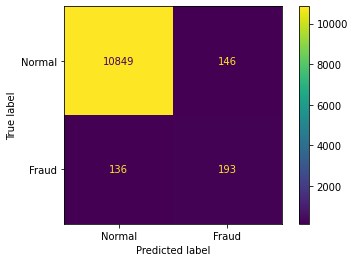

In [52]:
matrix = confusion_matrix(train_df.y_true, train_result_outlier[0])
disp = ConfusionMatrixDisplay(matrix, display_labels=['Normal', 'Fraud'])
disp.plot()
plt.show()

# Выводы
+ Несмотря на кажущийся хороший результат - с точки зрения практического применения модель показывает плохие результаты: почти половина мошеннических операций обходит нашу систему
+ Наверняка результаты можно улушить, если более активно работать с данными: разделять ключ:значение в pathParams
+ Изменение количества соседей помогло добиться более хороших результатов